<a href="https://colab.research.google.com/github/Benyapa-T/BSC_DPDM2025/blob/main/Ch3_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/BSC DPDM/Data/flooding database.csv'
flood = pd.read_csv(path)
flood.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


#Data Cleaning

##Missing Data

###Check Missing Data

In [ ]:
flood.isnull().any()

,0
system:index,False
index,False
threshold_type,False
glide_index,True
dfo_country,False
dfo_other_country,True
dfo_centroid_x,False
dfo_centroid_y,False
dfo_began,False
dfo_ended,True


In [ ]:
flood.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


###Drop Record ที่มี missing ออก

drop ถ้ามี missing

In [ ]:
flood.shape

(913, 23)

In [ ]:
flood_drop1 = flood.dropna()
flood_drop1.shape

(13, 23)

drop ถ้ามี missing ในตัวแปรที่เราจะใช้

- dfo_country
- dfo_other_country
- dfo_began
- dfo_ended
- dfo_dead
- dfo_cause
- dfo_severity

In [ ]:
flood_drop2 = flood.dropna(subset=['dfo_country','dfo_other_country','dfo_began','dfo_ended','dfo_dead','dfo_cause','dfo_severity'])
flood_drop2.shape

(637, 23)

In [ ]:
flood_drop2.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


### เติม Dummy

ตรวจสอบ dfo_other_country ก่อน เพื่อพิจารณาการเติม Dummy

In [ ]:
flood[flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
172,DFO_2415_From_20040110_to_20040119,2415,std,0,Iran,NaN,51.439491,29.466641,1/10/04,1/19/04,...,Heavy rain,1.0,7017.61,23986.0,23986.0,116060,1,0,-92074,NaN
383,DFO_3089_From_20070530_to_20070603,3089,std,0,Dominican Republic,NaN,-71.053795,19.547861,5/30/07,6/3/07,...,Heavy rain,1.0,100.92,13819.0,13819.0,11672,1,0,2147,NaN
387,DFO_3097_From_20070611_to_20070624,3097,std,LS-2007-000080-BGD,Bangladesh,NaN,91.953546,22.397464,6/11/07,6/24/07,...,Heavy rain,1.0,20493.38,4536692.0,4536692.0,8995159,1,0,-4458467,NaN
412,DFO_3136_From_20070721_to_20071015,3136,std,0,Bangladesh,NaN,91.233643,23.916419,7/21/07,10/15/07,...,Heavy rain,1.0,78785.53,27712991.0,27712998.0,55288622,0,-7,-27575631,NaN
428,DFO_3166_From_20070726_to_20071010,3166,std,FL-2007-000132-BFA,Ghana,NaN,0.612005,13.037658,7/26/07,10/10/07,...,Heavy rain,1.5,7621.96,325408.0,325408.0,624312,1,0,-298904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [ ]:
flood[~flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,DFO_4516_From_20170908_to_20170919,4516,std,TC-2017-000132-CUB,USA,Cuba,-81.625156,28.594245,9/8/17,9/19/17,...,"Tropical Storm, Surge",2.0,9990.79,108896.0,92345.0,108883,0,16551,13,NaN
886,DFO_4581_From_20180310_to_20180314,4581,std,NaN,Croatia,Bosnia and Herzegovina,16.947210,44.734938,3/10/18,3/14/18,...,"Snowmelt, Ice, Rain",1.0,1564.28,53495.0,50783.0,53495,1,2712,0,NaN
893,DFO_4597_From_20180325_to_20180408,4597,std,NaN,Greece,Bulgaria,26.671405,41.531705,3/25/18,4/8/18,...,Heavy rain,1.5,2818.83,57706.0,51639.0,57706,1,6067,0,NaN
897,DFO_4640_From_20180625_to_20180711,4640,std,NaN,India,Pakistan,75.143900,33.375200,6/25/18,7/11/18,...,Heavy rain,1.0,2104.94,224236.0,60172.0,224236,1,164064,0,NaN


เติม Unknown ใน dfo_other_country

In [ ]:
flood_fillunknown = flood.fillna(value={'dfo_other_country':'Unknown'})
flood_fillunknown.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


### เติม Missing ด้วยค่ากลาง

เป็นข้อมูล Norminal เติมด้วย mode

In [ ]:
flood.groupby('dfo_cause').count()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_displaced,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
dfo_cause,,,,,,,,,,,,,,,,,,,,,
Dam,13,13,13,11,13,10,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
Heavy rain,749,749,749,554,749,530,749,749,749,748,...,749,749,749,748,748,749,749,749,749,16
"Snowmelt, Ice, Rain",52,52,52,45,52,45,52,52,52,52,...,52,52,52,52,52,52,52,52,52,7
"Tropical Storm, Surge",97,97,97,71,97,53,97,97,97,97,...,97,97,97,97,97,97,97,97,97,1


In [ ]:
flood_fillmode = flood.fillna({'dfo_cause':'Heavy rain'})
flood_fillmode

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


###เติมด้วยตัวแทนของกลุ่ม

จัดกลุ่มข้อมูลตาม dfo_severity แล้วค่อยเติม dfo_cause

In [ ]:
flood.groupby(['dfo_cause','dfo_severity']).count()

system:index  index  threshold_type  \
dfo_cause             dfo_severity                                        
Dam                   1.0                      9      9               9   
                      1.5                      3      3               3   
                      2.0                      1      1               1   
Heavy rain            1.0                    464    464             464   
                      1.5                    163    163             163   
                      2.0                    122    122             122   
Snowmelt, Ice, Rain   1.0                     34     34              34   
                      1.5                      8      8               8   
                      2.0                     10     10              10   
Tropical Storm, Surge 1.0                     33     33              33   
                      1.5                     26     26              26   
                      2.0                     38     38              38   

                                    glide_index  dfo_country  \
dfo_cause             dfo_severity                             
Dam                   1.0                     9            9   
                      1.5                     1            3   
                      2.0                     1            1   
Heavy rain            1.0                   390          464   
                      1.5                    72          163   
                      2.0                    92          122   
Snowmelt, Ice, Rain   1.0                    29           34   
                      1.5                     7            8   
                      2.0                     9           10   
Tropical Storm, Surge 1.0                    32           33   
                      1.5                    12           26   
                      2.0                    27           38   

                                    dfo_other_country  dfo_centroid_x  \
dfo_cause             dfo_severity                                      
Dam                   1.0                           9               9   
                      1.5                           0               3   
                      2.0                           1               1   
Heavy rain            1.0                         369             464   
                      1.5                          67             163   
                      2.0                          94             122   
Snowmelt, Ice, Rain   1.0                          30              34   
                      1.5                           6               8   
                      2.0                           9              10   
Tropical Storm, Surge 1.0                          28              33   
                      1.5                           7              26   
                      2.0                          18              38   

                                    dfo_centroid_y  dfo_began  dfo_ended  ...  \
dfo_cause             dfo_severity                                        ...   
Dam                   1.0                        9          9          9  ...   
                      1.5                        3          3          3  ...   
                      2.0                        1          1          1  ...   
Heavy rain            1.0                      464        464        463  ...   
                      1.5                      163        163        163  ...   
                      2.0                      122        122        122  ...   
Snowmelt, Ice, Rain   1.0                       34         34         34  ...   
                      1.5                        8          8          8  ...   
                      2.0                       10         10         10  ...   
Tropical Storm, Surge 1.0                       33         33         33  ...   
                      1.5                       26         26         26  ...   
            

In [ ]:
flood_sever1 = flood[flood['dfo_severity'] == 1.0]
flood_sever15 = flood[flood['dfo_severity'] == 1.5]
flood_sever2 = flood[flood['dfo_severity'] == 2.0]

In [ ]:
flood_sever1 = flood_sever1.fillna({'dfo_cause':'Heavy rain'})
flood_sever15 = flood_sever15.fillna({'dfo_cause':'Heavy rain'})
flood_sever2 = flood_sever2.fillna({'dfo_cause':'Tropical Storm, Surge'})

In [ ]:
flood_fillgroup = pd.concat([flood_sever1,flood_sever15,flood_sever2])
flood_fillgroup

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
5,DFO_1631_From_20000901_to_20000906,1631,std,0,China,0,113.483009,25.229313,9/1/00,9/6/00,...,Heavy rain,1.0,102.25,18.0,18.0,628,1,0,-610,NaN
9,DFO_1772_From_20010806_to_20010913,1772,std,0,Sudan,Ethiopia,34.427661,14.996666,8/6/01,9/13/01,...,Heavy rain,1.0,1384.61,11849.0,11849.0,11615,1,0,234,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,DFO_4507_From_20170810_to_20170826,4507,std,NaN,India,NaN,79.076049,28.165660,8/10/17,8/26/17,...,Heavy rain,2.0,22260.03,4982993.0,1501873.0,4982993,1,3481120,0,NaN
879,DFO_4515_From_20170823_to_20170826,4515,std,TC-2017-000120-CHN,China,NaN,114.138854,22.385119,8/23/17,8/26/17,...,"Tropical Storm, Surge",2.0,202.12,72361.0,58833.0,72361,1,13528,0,NaN
880,DFO_4516_From_20170908_to_20170919,4516,std,TC-2017-000132-CUB,USA,Cuba,-81.625156,28.594245,9/8/17,9/19/17,...,"Tropical Storm, Surge",2.0,9990.79,108896.0,92345.0,108883,0,16551,13,NaN
905,DFO_4667_From_20180820_to_20181002,4667,otsu,NaN,Nigeria,NaN,8.237500,10.474800,8/20/18,10/2/18,...,Heavy rain,2.0,8403.28,1448274.0,532141.0,1448274,1,916133,0,NaN


In [ ]:
flood_fillgroup.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


## Noisy Data

In [ ]:
flood['gfd_area']

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


Expore dada

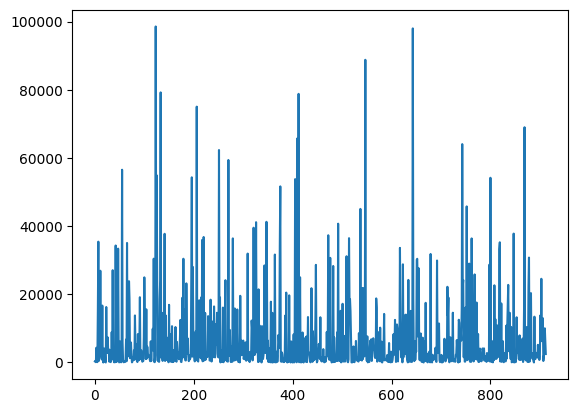

In [ ]:
import matplotlib.pyplot as plt
plt.plot(flood['gfd_area'])

### Binning

ใช้ histogram ดู Bin ที่เหมาะสม

(array([781.,  75.,  38.,   7.,   6.,   3.,   3.]),
 array([    0.        , 14078.23142857, 28156.46285714, 42234.69428571,
        56312.92571429, 70391.15714286, 84469.38857143, 98547.62      ]),
 <BarContainer object of 7 artists>)

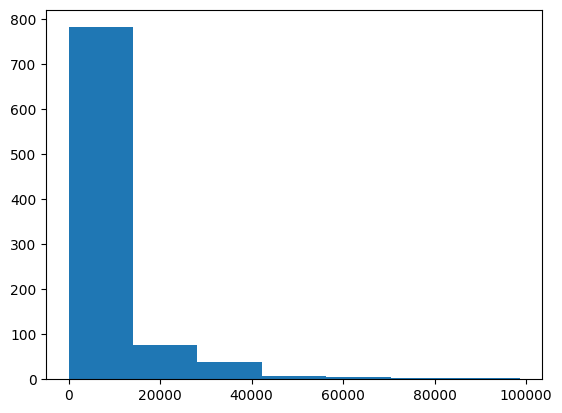

In [ ]:
outputhist = plt.hist(flood['gfd_area'],7)
outputhist

In [ ]:
outputhist[1]

array([    0.        , 14078.23142857, 28156.46285714, 42234.69428571,
       56312.92571429, 70391.15714286, 84469.38857143, 98547.62      ])

In [ ]:
def put_value_into_bin(value,bin_edges):
    for i in range(len(bin_edges)-1):
        if value >= bin_edges[i] and value < bin_edges[i+1]:
            new_val = bin_edges[i] + (bin_edges[i+1] + bin_edges[i])/2
            return new_val
    return None

In [ ]:
flood['gfd_area_bin'] = flood['gfd_area'].apply(lambda x: put_value_into_bin(x,outputhist[1]))

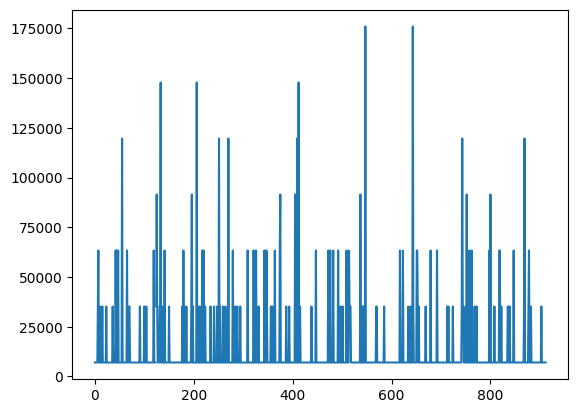

In [ ]:
plt.plot(flood['gfd_area_bin'])

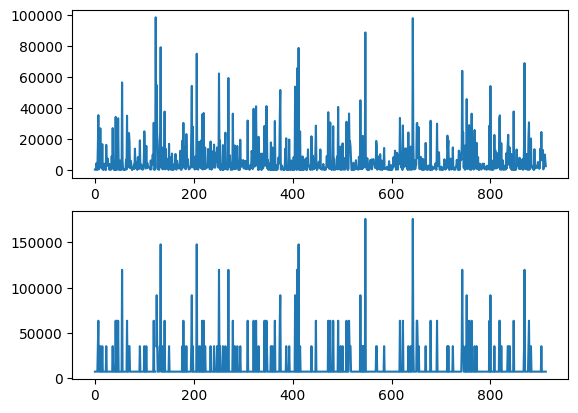

In [ ]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'])
plt.subplot(2,1,2)
plt.plot(flood['gfd_area_bin'])

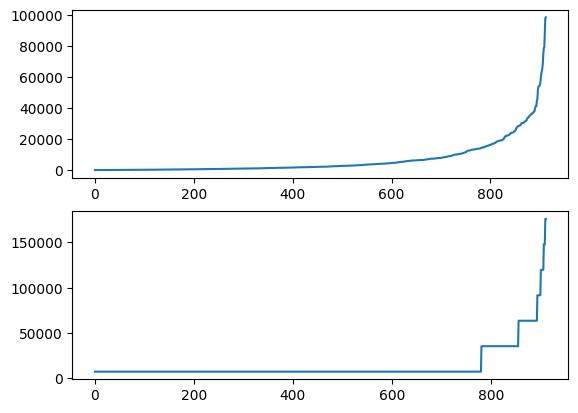

In [ ]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'].sort_values().reset_index(drop=True))
plt.subplot(2,1,2)
plt.plot(flood['gfd_area_bin'].sort_values().reset_index(drop=True))

### Outlier Removal

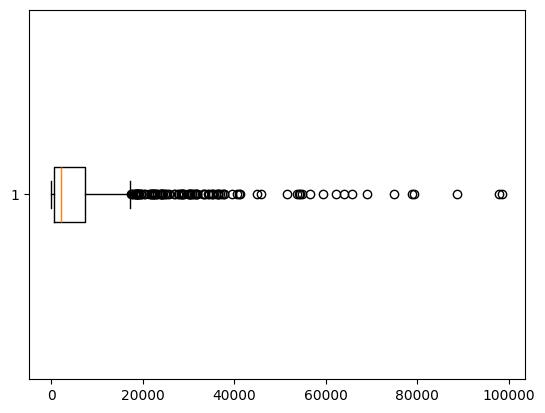

In [ ]:
plt.boxplot(flood['gfd_area'],vert=False);

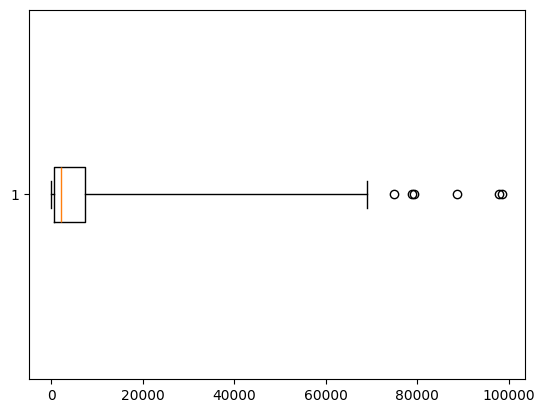

In [ ]:
outputbox = plt.boxplot(flood['gfd_area'],vert=False,whis=10);

In [ ]:
outputbox

{'whiskers': [<matplotlib.lines.Line2D at 0x7ef5d0e211f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ef5d0e22db0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ef5d0e214c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ef5d0e21f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ef5d0f4bc80>],
 'means': []}

In [ ]:
outputbox['whiskers'][0].get_xdata()

array([608.6,   0. ])

In [ ]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [ ]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outliers

In [ ]:
flood_nooutlier = flood[flood['gfd_area'] < outputbox['whiskers'][1].get_xdata()[1]]

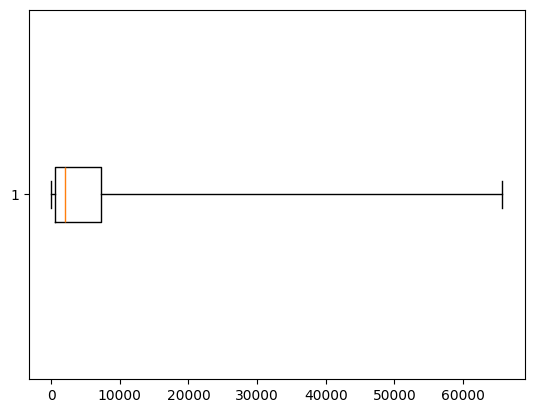

In [ ]:
outputbox2 = plt.boxplot(flood_nooutlier['gfd_area'],vert=False,whis=10);

 ตามหาค่า outlier

In [ ]:
flood[flood['gfd_area'] == outputbox['fliers'][0].get_xdata()[0]]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gfd_area_bin
123,DFO_2208_From_20030416_to_20030528,2208,std,0,Russia,0,64.739289,55.453563,4/16/03,5/28/03,...,1.0,98547.62,1014245.0,1014245.0,931108,1,0,83137,1.0,NaN


# Data Integration

Data exploration

project = โครงการ

unittype = แบบบ้าน/ประเภทบ้าน

In [3]:
project_df = pd.read_csv('/content/drive/MyDrive/BSC DPDM/Data/Copy of opendata_project-2.csv')
unittype_df = pd.read_csv('/content/drive/MyDrive/BSC DPDM/Data/Copy of opendata_unittype-2.csv')

In [ ]:
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [ ]:
unittype_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [ ]:
for i in project_df.columns:
    print (i)

row_number
project_id
name_en
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
price_min
developer_id
developer_name_en
developer_name_th
latitude
longitude
neighborhood_id
neighborhood_name_en
neighborhood_name_th
subdistrict_id
subdistrict_name_en
subdistrict_name_th
district_id
district_name_en
district_name_th
province_id
province_name_en
province_name_th
zipcode
count_elevator
count_elevator_service
count_floor
count_parking
count_tower
count_unit
count_unittype
facility_clubhouse
facility_fitness
facility_meeting
facility_park
facility_playground
facility_pool
facility_security
date_created
date_finish
date_updated
source
url_project
day


In [ ]:
for i in unittype_df.columns:
    print (i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


## Add more column to the table (X-Data Integration)

In [ ]:
unittype_df['project_id'].map(project_df.set_index('project_id')['name_th'])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
unittype_df['project_id'].map(project_df.set_index('project_id')[('name_th','propertytype_name_th',
                                                             'neighborhood_name_th','subdistrict_name_th',
                                                             'district_name_th','province_name_th')])

## Data doplicate

ดูก่อนว่า data มัน duplicate ยังไง

In [ ]:
project_df.duplicated().any()

np.True_

In [ ]:
project_df.duplicated().sum()

np.int64(2)

ขึ้น True แสดงว่ามี row ที่ซ้ำกัน

ขึ้น np.int64(2) แสงว่า มี 2 row ที่ข้อมูลซ้ำกับ row อื่น

In [ ]:
project_df[project_df.duplicated(keep=False)]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
138,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8103,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


แต่ถ้าดูแค่ project_id จะเห็นได้ว่ามีหลายตัวว่านั้น ที่ project_id ซ้ำกัน

In [ ]:
project_df[project_df.duplicated(subset=['project_id'],keep=False)]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
8,3795.0,5f04029cb285eb00194de1dd,City park sakaeo,ซิตี้ปาร์ค สระแก้ว 2,4,Commercial,อาคารพาณิชย์,1900000.0,5f03f344b285eb00194de191,"Sa Kaeo Development Co., Ltd.",...,1.0,NaN,NaN,1.0,2020-07-07 12:05:32,2016-01-01 07:00:00,2020-12-04 10:33:25,baania,https://baania.com/th/project/ซิตี้ปาร์ค-สระแก...,2023-06-11
23,20554.0,project_7343,Baan Nantana Garden,บ้านนันทนาการ์เด้นท์,3,Townhome,ทาวน์โฮม,1490000.0,developer_10510,NaN,...,1.0,1.0,1.0,1.0,2017-05-22 11:28:57,NaN,2020-12-04 10:37:28,baania,https://baania.com/th/project/บ้านนันทนาการ์เด...,2023-06-11
24,12456.0,project_4054,Cubist Townhome Sanambinnam,คิวบิสทาวน์โฮม สนามบินน้ำ,3,Townhome,ทาวน์โฮม,3790000.0,developer_2417,"PLUS PROPERTY CO., LTD.",...,1.0,NaN,NaN,1.0,2017-02-23 13:40:12,NaN,2021-07-15 15:30:11,baania,https://baania.com/th/project/คิวบิสทาวน์โฮม-ส...,2023-06-11
34,5047.0,5f34e60ec801fb0019dacbd6,Taraville Pechabura,ธาราวิลล์เพชบุระ,3,Townhome,ทาวน์โฮม,1000000.0,5f34e256c801fb0019dacbbe,"Thanthong Property and Construction Co., Ltd.",...,NaN,NaN,NaN,1.0,2020-08-13 14:04:46,NaN,2022-08-04 15:00:08,baania,https://baania.com/th/project/ธาราวิลล์เพชบุระ...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,6509.0,6177730c551dd10015a6916d,Bliss Baankhai Rayong,บลิซ บ้านค่าย ระยอง,20000,Twin house,บ้านแฝด,1890000.0,developer_97,SUPALAI PUBLIC COMPANY LIMITED,...,1.0,1.0,1.0,1.0,2021-10-26 10:16:28,NaN,2022-09-02 14:00:05,baania,https://baania.com/th/project/บลิซ-บ้านค่าย-ระ...,2023-06-11
23857,2954.0,project_13943,Baan Chalongsuk Phuket,บ้านฉลองสุข ภูเก็ต,4,Commercial,อาคารพาณิชย์,2690000.0,developer_8893,"Baan Charungklin Co,.Ltd.",...,NaN,NaN,NaN,1.0,2018-06-22 09:31:14,2013-12-31 07:00:00,2020-12-04 10:38:43,baania,https://baania.com/th/project/บ้านฉลองสุข-ภูเก...,2023-06-11
23860,13953.0,project_3144,Baan Alicha 5 Phutabucha 36,บ้านอลิชา 5 พุทธบูชา 36,20000,Twin house,บ้านแฝด,2600000.0,developer_2175,"Alicha Group Co., Ltd.",...,NaN,NaN,NaN,1.0,2016-12-15 16:46:06,2012-12-31 07:00:00,2020-12-04 10:45:47,baania,https://baania.com/th/project/บ้านอลิชา-5-พุทธ...,2023-06-11
23861,17686.0,project_3585,The Plant Wongwaen - Lumlukka Klong 5,เดอะ แพลนท์ วงแหวน-ลำลูกกา คลอง 5,1,Detached House,บ้าน,3350000.0,developer_1026,"PRUKSA REAL ESTATE PUB CO., LTD.",...,1.0,1.0,NaN,1.0,2017-01-25 13:33:17,2022-12-31 07:00:00,2023-04-28 16:30:03,baania,https://baania.com/th/project/เดอะ-แพลนท์-วงแห...,2023-06-11


ลบข้อมูลที่มี project_id ซ้ำกันโดยเก็บไว้เฉพาะตัวที่เป็นข้อมูลล่าสุด

In [ ]:
project_df_dedup = project_df.drop_duplicates(subset=['project_id'],keep='last')
project_df_dedup

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11
5,16.0,project_14790,Huahin Palm Village,หัวหิน ปาล์ม วิลเลจ,1,Detached House,บ้าน,NaN,developer_10510,NaN,...,0.0,0.0,0.0,1.0,2018-10-04 13:44:29,2011-10-31 07:00:00,2020-12-04 10:45:10,baania,https://baania.com/th/project/หัวหิน-ปาล์ม-วิล...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23862,17534.0,project_9330,Parinyada Wongwan Sathorn,ปริญญดา วงแหวนสาทร,1,Detached House,บ้าน,4780000.0,developer_1762,NaN,...,1.0,NaN,1.0,1.0,2017-08-22 16:58:38,2006-12-31 07:00:00,2020-12-04 10:46:24,baania,https://baania.com/th/project/ปริญญดา-วงแหวนสา...,2023-06-11
23863,12360.0,project_9316,Sinwong Garden,สินวงศ์การ์เด้น,20000,Twin house,บ้านแฝด,1280000.0,developer_10510,NaN,...,NaN,NaN,NaN,1.0,2017-08-22 15:19:06,NaN,2023-02-02 18:30:02,baania,https://baania.com/th/project/สินวงศ์การ์เด้น-...,2023-06-11
23864,6865.0,project_15993,La Maison Sukhumvit 22,ลาเมซอง สุขุมวิท 22,2,Condo,คอนโด,9350000.0,developer_10510,NaN,...,NaN,NaN,1.0,1.0,2019-07-02 15:34:11,1994-12-31 07:00:00,2021-07-05 12:00:14,baania,https://baania.com/th/project/ลาเมซอง-สุขุมวิท...,2023-06-11
23865,74.0,project_105,Regent 1,รีเจ้นท์ 1,1,Detached House,บ้าน,3100000.0,developer_100,"THE TROPICAL HOME CO., LTD.",...,NaN,NaN,1.0,1.0,2015-09-23 09:06:27,NaN,2020-12-04 10:44:04,baania,https://baania.com/th/project/รีเจ้นท์-1-proje...,2023-06-11


In [ ]:
# unittype_df['ชื่อโครงการ'] = unittype_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])
# unittype_df.head()

### Hw3 กลับไปเติม column ที่เหลือ

'developer_name_th','neighborhood_name_th','subdistrict_name_th','district_name_th','province_name_th'

ใช้ .map()

In [ ]:
map_unittype_df = unittype_df.copy()

In [ ]:
lookup = project_df_dedup.set_index('project_id')

map_unittype_df['ชื่อโครงการ'] = map_unittype_df['project_id'].map(lookup['name_th'])
map_unittype_df['ผู้พัฒนา'] = map_unittype_df['project_id'].map(lookup['developer_name_th'])
map_unittype_df['ย่าน'] = map_unittype_df['project_id'].map(lookup['neighborhood_name_th'])
map_unittype_df['ตำบล/แขวง'] = map_unittype_df['project_id'].map(lookup['subdistrict_name_th'])
map_unittype_df['เขต/อำเภอ'] = map_unittype_df['project_id'].map(lookup['district_name_th'])
map_unittype_df['จังหวัด'] = map_unittype_df['project_id'].map(lookup['province_name_th'])

In [ ]:
map_unittype_df

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล/แขวง,เขต/อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,880000.0,...,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา
43370,23721,unittype_15644,project_6109,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,45.0,140.0,2400000.0,...,2020-10-14 23:03:19,baania,https://baania.com/th/project/บ้านเต็มสิริ-1-6...,2023-06-11,บ้านเต็มสิริ 1,NaN,หนองจอก,คู้ฝั่งเหนือ,หนองจอก,กรุงเทพมหานคร
43371,31551,unittype_21385,project_8392,อาคารพาณิชย์สี่ชั้น type B,4,Commercial,อาคารพาณิชย์,34.0,192.0,13000000.0,...,2020-10-14 00:38:09,baania,https://baania.com/th/project/พระเงิน-เพลส-839...,2023-06-11,พระเงิน เพลส,NaN,บางม่วง,บางม่วง,บางใหญ่,นนทบุรี
43372,29837,unittype_26243,project_10566,ทาวน์โฮมสามชั้น,3,Townhome,ทาวน์โฮม,NaN,191.0,2600000.0,...,2020-10-16 16:33:56,baania,https://baania.com/th/project/บ้านไทยวิลล่า-ศร...,2023-06-11,บ้านไทยวิลล่า ศรีราชา,NaN,นิคมปิ่นทอง 3,บึง,ศรีราชา,ชลบุรี


ใช้ .merge()

In [ ]:
cols_to_map = ['project_id','name_th','developer_name_th','neighborhood_name_th',
               'subdistrict_name_th','district_name_th','province_name_th']

In [ ]:
merge_unittype_df = (
    unittype_df
    .merge(
        project_df_dedup[cols_to_map],
        on='project_id',
        how='left'
    )
    .rename(columns={
        'name_th': 'ชื่อโครงการ',
        'developer_name_th': 'ผู้พัฒนา',
        'neighborhood_name_th': 'ย่าน',
        'subdistrict_name_th': 'ตำบล/แขวง',
        'district_name_th': 'เขต/อำเภอ',
        'province_name_th': 'จังหวัด'
    })
)

In [ ]:
merge_unittype_df

,row_number,unittype_id,project_id,name_th_x,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,name_th_y,ผู้พัฒนา,ย่าน,ตำบล/แขวง,เขต/อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,880000.0,...,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา
43370,23721,unittype_15644,project_6109,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,45.0,140.0,2400000.0,...,2020-10-14 23:03:19,baania,https://baania.com/th/project/บ้านเต็มสิริ-1-6...,2023-06-11,บ้านเต็มสิริ 1,NaN,หนองจอก,คู้ฝั่งเหนือ,หนองจอก,กรุงเทพมหานคร
43371,31551,unittype_21385,project_8392,อาคารพาณิชย์สี่ชั้น type B,4,Commercial,อาคารพาณิชย์,34.0,192.0,13000000.0,...,2020-10-14 00:38:09,baania,https://baania.com/th/project/พระเงิน-เพลส-839...,2023-06-11,พระเงิน เพลส,NaN,บางม่วง,บางม่วง,บางใหญ่,นนทบุรี
43372,29837,unittype_26243,project_10566,ทาวน์โฮมสามชั้น,3,Townhome,ทาวน์โฮม,NaN,191.0,2600000.0,...,2020-10-16 16:33:56,baania,https://baania.com/th/project/บ้านไทยวิลล่า-ศร...,2023-06-11,บ้านไทยวิลล่า ศรีราชา,NaN,นิคมปิ่นทอง 3,บึง,ศรีราชา,ชลบุรี


## Add more column to the table (Y-Data Integration)

In [ ]:
unittype_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


สมมุติว่า data เก็บแยกขนิดของบ้าน

In [ ]:
set(unittype_df['propertytype_name_th'])

{'คอนโด',
 'ทาวน์โฮม',
 'ที่ดิน',
 'บ้าน',
 'บ้านแฝด',
 'สำนักงาน',
 'อพาตเมนต์',
 'อาคารพาณิชย์',
 'โกดัง / โรงงาน',
 'โรงแรม',
 'โฮมออฟฟิศ'}

In [ ]:
house = unittype_df[unittype_df['propertytype_name_th'] == 'บ้าน']
condo = unittype_df[unittype_df['propertytype_name_th'] == 'คอนโด']

In [ ]:
print(house.shape)
print(condo.shape)

(17777, 28)
(12806, 28)


In [ ]:
house_condo = pd.concat([house,condo])
house_condo.shape

(30583, 28)

## Data Transfromation

ในกรณีที่ข้อมูลใน column เดียวกันใช้หน่วยไม่เหมือนกัน ต้องมีการแปลงข้อมูลก่อน

ทำให้หน่วยของราคาบ้านไม่เท่ากัน

* condo หน่วยบาท

* house หน่วยล้านบาท

In [ ]:
house['price_min'] = house['price_min'] / 1000000
house

/tmp/ipython-input-3644753605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_min'] = house['price_min'] / 1000000


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.5000,...,NaN,NaN,NaN,NaN,NaN,2022-09-12 13:00:04,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.6000,...,1.0,NaN,NaN,1.0,NaN,2022-08-17 15:00:06,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.7900,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.3000,...,1.0,NaN,1.0,1.0,NaN,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,160.0,3.2000,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:38:02,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11
43363,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,Detached House,บ้าน,2.0,170.0,3.8614,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:24:08,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,Detached House,บ้าน,NaN,186.0,5.3900,...,NaN,NaN,NaN,NaN,NaN,2023-03-28 15:00:05,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,0.8800,...,1.0,NaN,NaN,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11


ตรวจสอบ scale คล่าวๆ

In [ ]:
from matplotlib import pyplot as plt

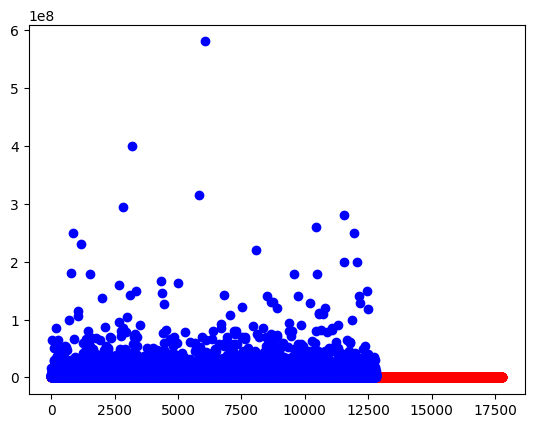

In [ ]:
plt.scatter(range(len(house['price_min'])), house['price_min'], c='r')
plt.scatter(range(len(condo['price_min'])), condo['price_min'], c='b');

แปลงค่าหน่วยของ condo ให้เป็นหน่วยล้านบาท แล้วรวม data

In [ ]:
condo['price_min'] = condo['price_min'] / 1000000
condo.head()

/tmp/ipython-input-1643772292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo['price_min'] = condo['price_min'] / 1000000


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,3.70,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,4.20,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11
8,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,3.35,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11
14,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,15.90,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11
16,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,4.70,...,NaN,NaN,NaN,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11


In [ ]:
house_condo_tran = pd.concat([house,condo])
house_condo_tran.head(10)

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.500,...,NaN,NaN,NaN,NaN,NaN,2022-09-12 13:00:04,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.600,...,1.0,NaN,NaN,1.0,NaN,2022-08-17 15:00:06,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.790,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.300,...,1.0,NaN,1.0,1.0,NaN,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11
15,39347,unittype_39928,project_17423,Plan A,1,Detached House,บ้าน,NaN,179.0,2.864,...,1.0,NaN,NaN,NaN,NaN,2022-03-10 17:30:05,2022-03-10 17:07:46,baania,https://baania.com/th/project/บ้านสวนกลางดง-17...,2023-06-11
17,41296,5ea143dd38be3400128e35ea,5ea1427f38be3400128e35d9,บ้านเดี่ยวชั้นเดียว TR03,1,Detached House,บ้าน,NaN,NaN,1.890,...,1.0,NaN,NaN,NaN,NaN,2021-11-12 13:18:46,2020-06-26 15:29:10,baania,https://baania.com/th/project/เดอะ-ริช-โฮม-หนอ...,2023-06-11
18,14527,unittype_24901,project_9937,บ้านเพิ่มทรัพย์,1,Detached House,บ้าน,56.25,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-13 16:30:04,2022-09-13 16:23:20,baania,https://baania.com/th/project/อภิลาภแลนด์-9937...,2023-06-11
22,41549,5eafd05d68253d0012adc7fd,5eafcf3f68253d0012adc7e9,บ้านเดี่ยวชั้นเดียว Type C,1,Detached House,บ้าน,NaN,115.0,2.200,...,1.0,NaN,NaN,NaN,NaN,2022-02-17 16:00:12,2022-02-17 15:44:31,baania,https://baania.com/th/project/บ้านจุฑามาศ-5eaf...,2023-06-11
23,21811,642140fefecf230013348f68,63072ea1713e23001a6a68f9,Franconia,1,Detached House,บ้าน,NaN,521.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-03-27 14:30:02,2023-03-27 14:08:54,baania,https://baania.com/th/project/แกรนด์-บางกอก-บู...,2023-06-11


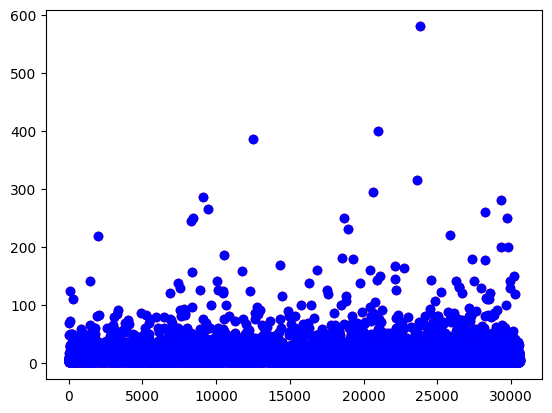

In [ ]:
plt.scatter(range(len(house_condo_tran['price_min'])), house_condo_tran['price_min'], c='r')
plt.scatter(range(len(house_condo_tran['price_min'])), house_condo_tran['price_min'], c='b');

In [ ]:
house_condo_tran[house_condo_tran['price_min'] > 300]

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
30469,21591,63f6e58e9b028e00130ae6f6,63f6e3b09b028e00130ae6e5,บ้านเดี่ยวสามชั้น,1,Detached House,บ้าน,NaN,2918.00,385.0,...,NaN,NaN,NaN,NaN,NaN,2023-02-23 11:30:03,2023-02-23 11:05:42,baania,https://baania.com/th/project/อสงไขย-63f6e3b09...,2023-06-11
11071,11195,unittype_36249,project_15531,Penthouse,2,Condo,คอนโด,NaN,844.56,400.0,...,2.0,3.0,1.0,NaN,NaN,2023-05-27 07:30:02,2023-05-27 07:19:29,baania,https://baania.com/th/project/บันยัน-ทรี-เรสซิ...,2023-06-11
19928,4397,unittype_7639,project_2540,Penthouse,2,Condo,คอนโด,NaN,1050.00,315.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:45,2020-10-14 00:56:43,baania,https://baania.com/th/project/โฟร์ซีซั่นส์-ไพร...,2023-06-11
20668,34097,unittype_37324,project_16305,Penthouse,2,Condo,คอนโด,NaN,1182.00,580.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:31,2020-10-14 00:55:50,baania,https://baania.com/th/project/เดอะ-สุโขทัย-เรส...,2023-06-11


In [ ]:
house_condo_tran[house_condo_tran['price_min'] > 300]['url_unittype'].values

array(['https://baania.com/th/project/อสงไขย-63f6e3b09b028e00130ae6e5/บ้านเดี่ยวสามชั้น-63f6e58e9b028e00130ae6f6',
       'https://baania.com/th/project/บันยัน-ทรี-เรสซิเดนซ์-ริเวอร์ไซด์-กรุงเทพ-15531/penthouse-unittype_36249',
       'https://baania.com/th/project/โฟร์ซีซั่นส์-ไพรเวท-เรสซิเด้นซ์-2540/penthouse-unittype_7639',
       'https://baania.com/th/project/เดอะ-สุโขทัย-เรสซิเด้นซ์-16305/penthouse-unittype_37324'],
      dtype=object)

## Column Alignmation

สลับ column condo

In [ ]:
condo.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day'],
      dtype='object')

In [ ]:
column_titles = ['count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min']

In [ ]:
condo_swop = condo.reindex(columns = column_titles)

In [ ]:
condo_swop.head()

,count_airconditioner,count_elevator,count_floor_internal,count_parking,count_room_bath,count_room_bed,count_room_dinning,count_room_guest,count_room_kitchen,count_room_living,...,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min
0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,...,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,3.70
4,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,1.0,1.0,...,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,4.20
8,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,3.35
14,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,...,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,15.90
16,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,...,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,4.70


In [ ]:
house_condo_swop = pd.concat([house,condo_swop])
house_condo_swop.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day'],
      dtype='object')

ถ้า column ไม่เท่ากัน

In [ ]:
condo_swop['price_min_baht'] = condo_swop['price_min'] * 1000000
condo_swop.head()

,count_airconditioner,count_elevator,count_floor_internal,count_parking,count_room_bath,count_room_bed,count_room_dinning,count_room_guest,count_room_kitchen,count_room_living,...,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,price_min_baht
0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,...,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,3.70,3700000.0
4,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,1.0,1.0,...,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,4.20,4200000.0
8,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,3.35,3350000.0
14,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,...,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,15.90,15900000.0
16,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,...,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,4.70,4700000.0


In [ ]:
house_condo_swop2 = pd.concat([house,condo_swop])
house_condo_swop2.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'price_min_baht'],
      dtype='object')

In [ ]:
house_condo_swop2

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,price_min_baht
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,NaN
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.50,...,NaN,NaN,NaN,NaN,2022-09-12 13:00:04,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,NaN
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.60,...,NaN,NaN,1.0,NaN,2022-08-17 15:00:06,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,NaN
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.79,...,NaN,NaN,NaN,NaN,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,NaN
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.30,...,NaN,1.0,1.0,NaN,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,17263,60488b2e582962001402e663,60488aeca8b9ee0013d7ebac,1 Bedroom,2,Condo,คอนโด,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-03-10 16:30:04,2021-03-10 16:07:33,baania,https://baania.com/th/project/เดอะ-ไพรเวซี่-พา...,2023-06-11,NaN
43357,32766,unittype_32126,project_13619,1 Bedroom,2,Condo,คอนโด,NaN,31.0,6.50,...,1.0,NaN,NaN,NaN,2022-05-17 15:30:05,2022-05-17 15:17:54,baania,https://baania.com/th/project/วาลเด้น-อโศก-136...,2023-06-11,6500000.0
43364,12599,unittype_24778,project_9877,2 Bedroom,2,Condo,คอนโด,NaN,49.0,3.50,...,NaN,NaN,NaN,NaN,2022-08-18 15:00:06,2022-08-18 14:44:59,baania,https://baania.com/th/project/ซีซี-คอนโดมิเนีย...,2023-06-11,3500000.0
43366,11147,unittype_35831,project_15356,Studio,2,Condo,คอนโด,NaN,27.0,4.99,...,NaN,NaN,NaN,NaN,2022-09-22 15:00:06,2022-09-22 14:56:47,baania,https://baania.com/th/project/ไอดีโอ-โมบิ-รางน...,2023-06-11,4990000.0


In [ ]:
house_condo_swop3 = pd.concat([condo_swop,house])
house_condo_swop3.columns

Index(['count_airconditioner', 'count_elevator', 'count_floor_internal',
       'count_parking', 'count_room_bath', 'count_room_bed',
       'count_room_dinning', 'count_room_guest', 'count_room_kitchen',
       'count_room_living', 'count_room_maid', 'count_room_storage',
       'count_room_utility', 'date_created', 'date_updated', 'source',
       'url_unittype', 'day', 'row_number', 'unittype_id', 'project_id',
       'name_th', 'propertytype_id', 'propertytype_name_en',
       'propertytype_name_th', 'area_total_min_wa', 'area_usable_min',
       'price_min', 'price_min_baht'],
      dtype='object')

In [ ]:
house_condo_swop3.head()

,count_airconditioner,count_elevator,count_floor_internal,count_parking,count_room_bath,count_room_bed,count_room_dinning,count_room_guest,count_room_kitchen,count_room_living,...,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,price_min_baht
0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,...,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,3.70,3700000.0
4,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,1.0,1.0,...,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,4.20,4200000.0
8,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,3.35,3350000.0
14,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,...,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,15.90,15900000.0
16,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,...,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,4.70,4700000.0


df ที่มี column น้อยกว่าจะเป็นค่าว่าง ทั้งในกรณีที่ตารางที่มี column น้อยกว่า และ กรณีที่ตารางที่มี column มากกว่า

## Add Data Source Column

เตรียมปัญหา โดย drop column property type ออก

In [ ]:
house_drop = house.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])
condo_drop = condo.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])

In [ ]:
house_drop.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th',
       'area_total_min_wa', 'area_usable_min', 'price_min',
       'count_airconditioner', 'count_elevator', 'count_floor_internal',
       'count_parking', 'count_room_bath', 'count_room_bed',
       'count_room_dinning', 'count_room_guest', 'count_room_kitchen',
       'count_room_living', 'count_room_maid', 'count_room_storage',
       'count_room_utility', 'date_created', 'date_updated', 'source',
       'url_unittype', 'day'],
      dtype='object')

เพิ่มชื่อ colums ว่ามาจากแหล่งไหน

In [ ]:
house_drop['data_source'] = 'house'
condo_drop['data_source'] = 'condo'

In [ ]:
house_condo_source = pd.concat([house_drop,condo_drop])
house_condo_source

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,data_source
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,house
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6.50,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,2022-09-12 13:00:04,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,house
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4.60,NaN,NaN,2.0,...,NaN,NaN,1.0,NaN,2022-08-17 15:00:06,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,house
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2.79,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,house
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5.30,NaN,NaN,2.0,...,NaN,1.0,1.0,NaN,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,17263,60488b2e582962001402e663,60488aeca8b9ee0013d7ebac,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-03-10 16:30:04,2021-03-10 16:07:33,baania,https://baania.com/th/project/เดอะ-ไพรเวซี่-พา...,2023-06-11,condo
43357,32766,unittype_32126,project_13619,1 Bedroom,NaN,31.0,6.50,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,2022-05-17 15:30:05,2022-05-17 15:17:54,baania,https://baania.com/th/project/วาลเด้น-อโศก-136...,2023-06-11,condo
43364,12599,unittype_24778,project_9877,2 Bedroom,NaN,49.0,3.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-08-18 15:00:06,2022-08-18 14:44:59,baania,https://baania.com/th/project/ซีซี-คอนโดมิเนีย...,2023-06-11,condo
43366,11147,unittype_35831,project_15356,Studio,NaN,27.0,4.99,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-09-22 15:00:06,2022-09-22 14:56:47,baania,https://baania.com/th/project/ไอดีโอ-โมบิ-รางน...,2023-06-11,condo


# Data Reduction

## PCA(X-axist feature)

ดูใน notebook [Ch3_dimensionality_reduction_PCA.ipynb](https://colab.research.google.com/drive/1382OYE1wX3YZPCi0YLMqIsgMK19BQRZ6?usp=sharing)

## Sampling(Y-axsit feature)

* balance data (class $\hat y$ balanced)

In [ ]:
project_df = pd.read_csv('/content/drive/MyDrive/BSC DPDM/Data/Copy of opendata_project-2.csv')
unittype_df = pd.read_csv('/content/drive/MyDrive/BSC DPDM/Data/Copy of opendata_unittype-2.csv')

In [4]:
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


### สมมุติ เราจะสร้าง model ทำนายว่า ข้อมูลที่ให้มาเป็น propertytype แบบไหน (บ้าน หรือ condo)

In [5]:
home = project_df[project_df['propertytype_name_th'] == 'บ้าน']
condo = project_df[project_df['propertytype_name_th'] == 'คอนโด']
print(f'home:{home.shape}\n condo:{condo.shape}')

home:(8859, 46)
 condo:(4796, 46)


### เราต้องการ data ที่ balance เพื่อสอน model ที่มมีประสิธิภาพ

เลือก home มาแค่ 4,796 row .sample()

In [6]:
home.sample()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
6651,16811.0,project_10153,Baan Irinlada 2,บ้านไอรินลดา 2,1,Detached House,บ้าน,3000000.0,developer_8221,NaN,...,1.0,NaN,NaN,1.0,2017-09-25 14:50:02,NaN,2021-01-25 14:00:12,baania,https://baania.com/th/project/บ้านไอรินลดา-2-p...,2023-06-11


### กำหนด  seed - random_state เพื่อให้ผลการ random เหมือนกันทุกครั้ง

In [7]:
home.sample(random_state=6)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
6802,23208.0,project_12666,Kunapat 1,บ้านคุณาภัทร 1,1,Detached House,บ้าน,2650000.0,developer_5663,NaN,...,0.0,0.0,0.0,1.0,2017-12-20 09:14:14,NaN,2020-12-04 10:43:56,baania,https://baania.com/th/project/บ้านคุณาภัทร-1-p...,2023-06-11


### สุ่ม data มาตามสักส่วนที่ต้องการ (frac)

In [8]:
home.sample(frac=0.5, random_state=6).shape

(4430, 46)

### สุ่มแบบหยิบคืน (replace = True)

In [13]:
home.sample(n=10, random_state=6, replace=True)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
7293,15880.0,624b087faae18f0013406c8e,Sanransiri Ramkhamhaeng,สราญสิริ รามคำแหง,1,Detached House,บ้าน,7000000.0,developer_36,"SANSIRI PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-04-04 22:02:23,NaN,2023-03-09 16:53:12,baania,https://baania.com/th/project/สราญสิริ-รามคำแห...,2023-06-11
22634,7550.0,project_10503,World Villa,เวิลด์วิลล่า,1,Detached House,บ้าน,7500000.0,developer_6811,"World Estate Development Co.,Ltd.",...,NaN,1.0,1.0,NaN,2017-10-04 15:45:29,NaN,2020-12-04 10:46:30,baania,https://baania.com/th/project/เวิลด์วิลล่า-pro...,2023-06-11
12568,17152.0,project_15437,Phanpraugsa Phase 2,พรรณพฤกษา เฟส 2,1,Detached House,บ้าน,3990000.0,developer_8911,NaN,...,1.0,1.0,0.0,1.0,2019-04-29 13:48:39,2019-12-31 07:00:00,2020-12-04 10:31:19,baania,https://baania.com/th/project/พรรณพฤกษา-เฟส-2-...,2023-06-11
22958,12445.0,646de96c5aa9150013a9a9e1,Phanason Resort (Laemhin),พนาสนธิ์ รีสอร์ท (แหลมหิน),1,Detached House,บ้าน,7500000.0,developer_2300,"PHANASON GROUP CO., LTD.",...,NaN,NaN,NaN,1.0,2023-05-24 17:39:40,2014-01-01 07:00:00,2023-05-24 18:00:05,baania,https://baania.com/th/project/พนาสนธิ์-รีสอร์ท...,2023-06-11
17333,10029.0,project_7510,Baan Arpakorn 3,บ้านอาภากร 3,1,Detached House,บ้าน,3990000.0,developer_5206,NaN,...,1.0,NaN,NaN,1.0,2017-05-29 15:47:28,2012-12-31 07:00:00,2020-12-04 10:37:42,baania,https://baania.com/th/project/บ้านอาภากร-3-pro...,2023-06-11
14378,16412.0,project_11938,The Enter Together,ดิ เอ็นเทอร์ ทูเก็ตเทอร์,1,Detached House,บ้าน,2000000.0,developer_5971,"Kanlapaphruek Development Co., Ltd.",...,NaN,NaN,NaN,1.0,2017-11-28 13:37:06,2012-03-31 07:00:00,2020-12-04 10:42:04,baania,https://baania.com/th/project/ดิ-เอ็นเทอร์-ทูเ...,2023-06-11
19451,4742.0,project_426,Preukpirom,พฤกษ์ภิรมย์,1,Detached House,บ้าน,1209000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2015-10-15 11:32:24,NaN,2020-12-04 10:36:42,baania,https://baania.com/th/project/พฤกษ์ภิรมย์-proj...,2023-06-11
11000,10335.0,project_2007,Baan Rungnirun 4,บ้านรุ่งนิรันดร์ โครงการ 4,1,Detached House,บ้าน,850000.0,developer_1362,NaN,...,NaN,NaN,NaN,NaN,2016-09-02 16:42:11,NaN,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านรุ่งนิรันดร์...,2023-06-11
6707,3676.0,project_15755,Baan Suk Chai Villeage,บ้านสุขใจ วิลเลจ,1,Detached House,บ้าน,3200000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2019-06-27 10:53:37,NaN,2020-12-04 10:42:23,baania,https://baania.com/th/project/บ้านสุขใจ-วิลเลจ...,2023-06-11
6291,7652.0,project_6275,Passorn 3 Rangsit Klong 3,ภัสสร 3 รังสิต คลอง 3,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,1.0,1.0,1.0,1.0,2017-04-25 17:23:56,NaN,2020-12-04 10:37:04,baania,https://baania.com/th/project/ภัสสร-3-รังสิต-ค...,2023-06-11


### สุ่มแบบ over-sanpling

In [15]:
condo.shape

(4796, 46)

In [14]:
condo.sample(n=8859, random_state=6, replace=True)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
13942,5579.0,project_2687,The Plenary Sathorn,เดอะ เพลนเนอรี่ สาทร,2,Condo,คอนโด,2490000.0,developer_1785,GENERAL ENVIRONMENTAL CONSERVATION PUBLIC COMP...,...,NaN,NaN,1.0,1.0,2016-11-23 14:48:42,2015-12-31 07:00:00,2022-10-07 21:00:05,baania,https://baania.com/th/project/เดอะ-เพลนเนอรี่-...,2023-06-11
1385,19608.0,project_2611,The Teak Phattanakarn-Thonglor,เดอะ ทีค พัฒนาการ-ทองหล่อ,2,Condo,คอนโด,2790000.0,developer_1997,NaN,...,1.0,NaN,1.0,1.0,2016-11-21 10:35:58,2016-06-30 07:00:00,2020-12-04 10:48:26,baania,https://baania.com/th/project/เดอะ-ทีค-พัฒนากา...,2023-06-11
10074,1542.0,project_17062,Quintara Treehaus Sukhumvit 42,ควินทารา ทรีเฮาส์ สุขุมวิท 42,2,Condo,คอนโด,4090000.0,developer_2008,NaN,...,1.0,1.0,1.0,1.0,2019-12-02 10:18:07,2020-04-30 07:00:00,2021-01-08 11:30:05,baania,https://baania.com/th/project/ควินทารา-ทรีเฮาส...,2023-06-11
23489,13352.0,project_4205,Phat Condominium,ภัทรคอนโดมิเนียม,2,Condo,คอนโด,313000.0,developer_10510,NaN,...,NaN,NaN,NaN,1.0,2017-02-27 09:14:35,NaN,2020-12-04 10:40:11,baania,https://baania.com/th/project/ภัทรคอนโดมิเนียม...,2023-06-11
1913,13681.0,project_3464,Zelle Salaya,เซล ศาลายา,2,Condo,คอนโด,1790000.0,developer_1762,"PRINSIRI PUB CO., LTD.",...,1.0,1.0,1.0,1.0,2017-01-23 08:46:55,2019-12-31 07:00:00,2023-04-24 16:00:05,baania,https://baania.com/th/project/เซล-ศาลายา-proje...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19527,7160.0,project_3008,Blossom Condo @Fashion Altitude,บลอสซั่ม คอนโด แอท แฟชั่น อัลติจูด,2,Condo,คอนโด,2000000.0,developer_1960,"SIAMESE ASSET PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2016-12-08 14:56:28,2017-12-31 07:00:00,2023-04-20 16:30:02,baania,https://baania.com/th/project/บลอสซั่ม-คอนโด-แ...,2023-06-11
6930,3364.0,project_14814,Baan Nub Kluen,บ้านนับคลื่น,2,Condo,คอนโด,3900000.0,developer_36,"SANSIRI PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2018-10-08 09:05:03,2009-12-31 07:00:00,2020-12-04 10:41:44,baania,https://baania.com/th/project/บ้านนับคลื่น-pro...,2023-06-11
12093,1706.0,project_6248,The Excel Bearing,ดิเอ็กซ์เซล แบริ่ง,2,Condo,คอนโด,1490000.0,developer_2012,"All Inspire Development Pub Co., Ltd.",...,NaN,NaN,1.0,1.0,2017-04-25 11:43:24,2015-12-31 07:00:00,2021-03-18 15:30:05,baania,https://baania.com/th/project/ดิเอ็กซ์เซล-แบริ...,2023-06-11
16803,20179.0,project_969,NHA Chiang Mai (Night Safari),บ้านเอื้ออาทรจังหวัดเชียงใหม่ (ไนท์ซาฟารี),2,Condo,คอนโด,630000.0,developer_9533,NATIONAL HOUSING AUTHORITY,...,NaN,1.0,NaN,1.0,2015-11-05 13:24:04,NaN,2020-12-04 10:41:21,baania,https://baania.com/th/project/บ้านเอื้ออาทรจัง...,2023-06-11
